In [1]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file 
df = pd.read_csv('NDVI.csv')

# Print the DataFrame
print(df)

         id    year   NDVI_08   NDVI_09   NDVI_10   NDVI_11   NDVI_12  \
0       1.0  2019.0  0.191540  0.181471  0.159935  0.374889  0.873755   
1       1.0  2020.0  0.203258  0.135215  0.129017  0.304074  0.709940   
2       1.0  2021.0  0.169163  0.139298  0.176505  0.324717  0.785839   
3       1.0  2022.0  0.122308  0.117480  0.127501  0.161553  0.620289   
4       2.0  2019.0  0.189737  0.194818  0.171174  0.490688  0.904467   
...     ...     ...       ...       ...       ...       ...       ...   
3195  799.0  2022.0  0.123714  0.117433  0.117978  0.434029  0.555517   
3196  800.0  2019.0  0.202469  0.194453  0.197959  0.619619  0.863051   
3197  800.0  2020.0  0.177476  0.176527  0.168000  0.424272  0.780884   
3198  800.0  2021.0  0.160505  0.145747  0.200651  0.810300  0.040291   
3199  800.0  2022.0  0.126200  0.122546  0.118038  0.433724  0.605364   

       NDVI_01   NDVI_02   NDVI_03   NDVI_04   NDVI_05   NDVI_06   NDVI_07  \
0     0.890306  0.427724  0.265450  0.845153 

In [3]:
df['Cover_crop'].replace('double_cover', 'double', inplace=True)
unique_classes = df['Cover_crop'].unique()

print("Unique classes in the 'Cover_crop' variable:")
for cls in unique_classes:
    print(cls)

Unique classes in the 'Cover_crop' variable:
double
single
cover


In [4]:
# Separate features (X) and target (y)
X = df.drop(columns=['Cover_crop'])
y = df['Cover_crop']

# Split data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
train_y_encoded = label_encoder.fit_transform(train_y)
test_y_encoded = label_encoder.transform(test_y)

In [5]:
# Initialize the model
lgbm_model = LGBMClassifier()

# Fit the model to the training data
lgbm_model.fit(train_X, train_y)

# Define hyperparameter grid
lgbm_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'num_leaves': [31, 62, 93],
    'min_data_in_leaf': [20, 30, 40]
}

# Grid search
lgbm_search = GridSearchCV(estimator=lgbm_model, param_grid=lgbm_grid, cv=10, n_jobs=-1)
lgbm_search.fit(train_X, train_y)

# Get best hyperparameters
best_params = lgbm_search.best_params_

# Evaluate model using cross-validation
cv_scores = cross_val_score(lgbm_model, train_X, train_y, cv=10, scoring='accuracy')
mean_cv_accuracy = cv_scores.mean()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3319
[LightGBM] [Info] Number of data points in the train set: 2240, number of used features: 14
[LightGBM] [Info] Start training from score -1.936579
[LightGBM] [Info] Start training from score -0.191831
[LightGBM] [Info] Start training from score -3.494723
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3319
[LightGBM] [Info] Number of data po

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [6]:
# Predictions on test set
test_preds = lgbm_model.predict(test_X)

# Calculate metrics
accuracy = accuracy_score(test_y, test_preds)
f1 = f1_score(test_y, test_preds, average='weighted')
recall = recall_score(test_y, test_preds, average='weighted')
precision = precision_score(test_y, test_preds, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(best_params)

Accuracy: 0.8896
F1 Score: 0.8803
Recall: 0.8896
Precision: 0.8794
{'max_depth': 10, 'min_data_in_leaf': 20, 'n_estimators': 100, 'num_leaves': 93}


Default labels

Class Labels:
cover
double
single


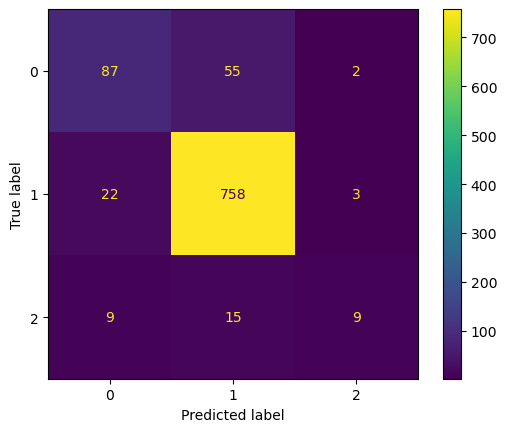

In [7]:
print("Default labels")
print("")

class_labels = lgbm_model.classes_

print("Class Labels:")
for label in class_labels:
    print(label)

cmBasic1 = confusion_matrix(test_y, test_preds, labels = lgbm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cmBasic1)
disp.plot()
plt.show()

# class 0 = cover crop
# class 1 = double crop
# class 2 = single crop